In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Lectura del CSV
Df =pd.read_csv('StudentsPerformance.csv')

In [3]:
Df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Observaciones:
5 de 8 columnas son datos categoricos. 

In [5]:
Df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observaciones:
La media de los datos de puntaje es de 68. Además de ser distribuciones muy parecidas. 


In [6]:
#porcentaje nulo para cada columna

null_df = round(100*(Df.isnull().sum().sort_values(ascending=False)/len(Df.index)),2)\
                    .to_frame().rename(columns={0:'Null values percentage'})[:15]
null_df

,Null values percentage
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


Set de datos sin valores nulos. 

# Datos categóricos a variables de estado .  

In [7]:
############# Descomposicion del dato categorica genero a dos columnas 
Dummy_sex=pd.get_dummies(Df['gender'], prefix = "Sex")
Dummy_sex

,Sex_female,Sex_male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [8]:
############ Se elimina la columna de genero y se añaden las columnas de hombre y mujer. 
Df_1=Df.drop(['gender'],axis=1)
Df_1=pd.concat([Df_1,Dummy_sex],axis=1)
Df_1

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Sex_female,Sex_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,1,0
996,group C,high school,free/reduced,none,62,55,55,0,1
997,group C,high school,free/reduced,completed,59,71,65,1,0
998,group D,some college,standard,completed,68,78,77,1,0


In [9]:
########################Descomponemos race/ethnicity %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Dummy1=pd.get_dummies(Df['race/ethnicity'], prefix = "race")
Df_1=Df_1.drop(['race/ethnicity'],axis=1)
Df_1=pd.concat([Df_1,Dummy1],axis=1)



In [10]:
#######################Descomponemos lunch %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Dummy2=pd.get_dummies(Df['lunch'], prefix = "lunch")
Df_1=Df_1.drop(['lunch'],axis=1)
Df_1=pd.concat([Df_1,Dummy2],axis=1)


In [11]:
#######################Descomponemos test preparation course %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Dummy3=pd.get_dummies(Df['test preparation course'], prefix = "preparation")
Df_1=Df_1.drop(['test preparation course'],axis=1)
Df_1=pd.concat([Df_1,Dummy3],axis=1)


In [12]:
######################Descomponemos parental level of education%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Dummy4=pd.get_dummies(Df['parental level of education'], prefix = "parental")
Df_1=Df_1.drop(['parental level of education'],axis=1)
Df_1=pd.concat([Df_1,Dummy4],axis=1)


In [13]:
Df_1

,math score,reading score,writing score,Sex_female,Sex_male,race_group A,race_group B,race_group C,race_group D,race_group E,lunch_free/reduced,lunch_standard,preparation_completed,preparation_none,parental_associate's degree,parental_bachelor's degree,parental_high school,parental_master's degree,parental_some college,parental_some high school
0,72,72,74,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1,69,90,88,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
2,90,95,93,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,47,57,44,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,76,78,75,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0
996,62,55,55,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
997,59,71,65,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
998,68,78,77,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0


# Analisis visual de los datos numericos 

<AxesSubplot:>

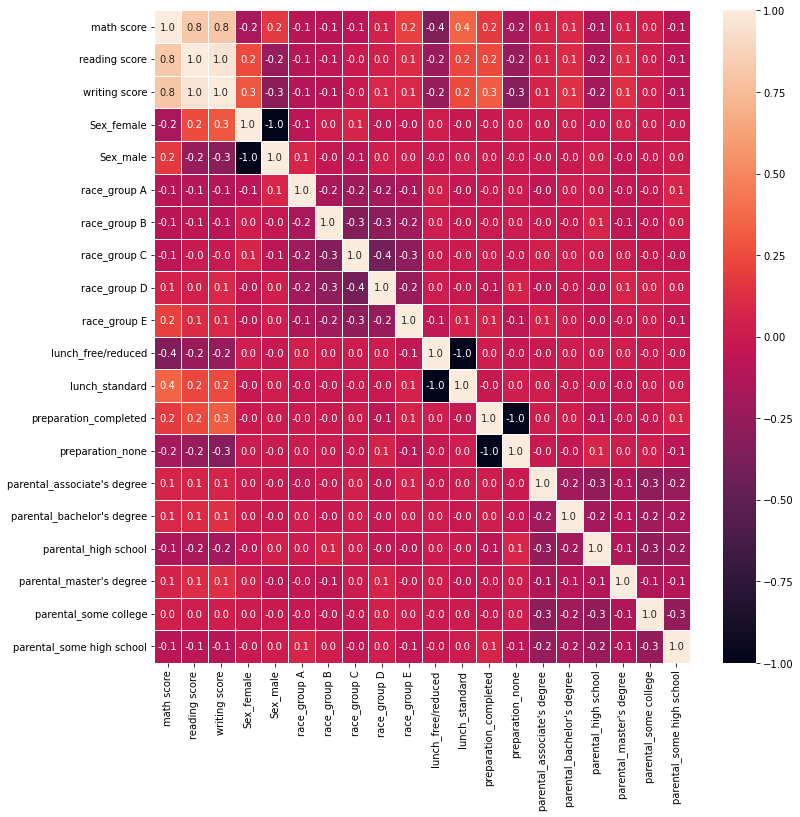

In [14]:
## Mapa de correlacion 
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(Df_1.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

## Conclusiones 
Al descomponer las variables categóricas podemos obtener una visualización más amplia de las variables que influyen en otras 
+ Los estudiantes con buen desempeño en el área de lectura tienen un buen puntaje en el área de escritura.
+ Las mujeres tienen un mejor desempeño en el área de lectura y escritura que los hombres.
+ Los hombres tienen un mejor desempeño en el área de matemáticas.
+ Los grupos étnicos E y D tienen un mejor desempeño.
+ El tipo de lonchera afecta a las el rendimiento de los estudiantes.
+ Los estudiantes que se prepararon para el examen tuvieron buenas notas .





# Graficos de columna 

In [15]:
##Conteo de Genero 
Df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Observaciones:
1. Proporción semejante entre los géneros 

Text(0.5, 0, 'Matematicas')

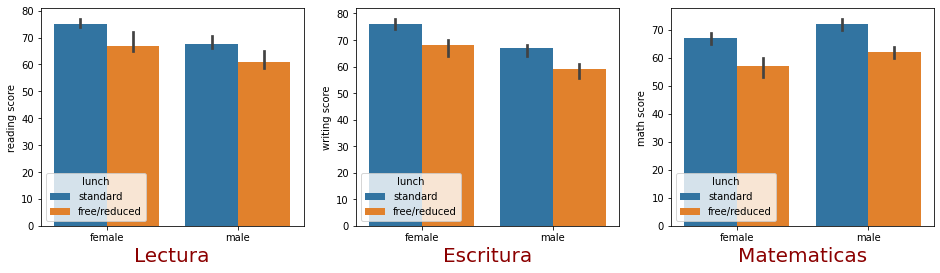

In [16]:
# Rendimiento de los estudiantes referente a los puntajes , género y lonchera.  
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.barplot(x='gender', y='reading score', hue='lunch', data=Df, estimator=np.median)
plt.xlabel("Lectura", fontsize = 20,  color = 'darkred')

plt.subplot(1,3,2)
sns.barplot(x='gender', y='writing score', hue='lunch', data=Df, estimator=np.median)
plt.xlabel("Escritura", fontsize = 20,  color = 'darkred')

plt.subplot(1,3,3)
sns.barplot(x='gender', y='math score', hue='lunch', data=Df, estimator=np.median)
plt.xlabel("Matematicas", fontsize = 20,  color = 'darkred')


Observaciones:
1. Los hombres tienen mayor habilidad sobre las matemáticas , Pero las mujeres tienen mayor habilidad en las áreas de la lectura y escritura 

2. La buena alimentacion es fundamental para un rendimiento mejor sobre los puntajes.

Text(0.5, 0, 'Matematicas')

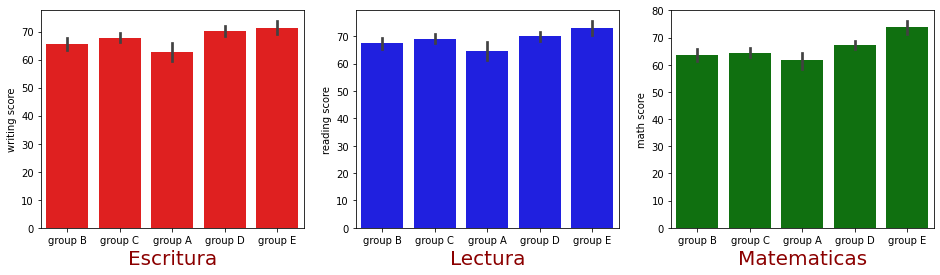

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
s1 = sns.barplot(x = 'race/ethnicity', y = 'writing score', data = Df, color = 'red')
plt.xlabel("Escritura", fontsize = 20,  color = 'darkred')
plt.subplot(1,3,2)
s2 = sns.barplot(x = 'race/ethnicity', y = 'reading score', data = Df, color = 'blue')
plt.xlabel("Lectura", fontsize = 20,  color = 'darkred')
plt.subplot(1,3,3)
s2 = sns.barplot(x = 'race/ethnicity', y = 'math score', data = Df, color = 'green')
plt.xlabel("Matematicas", fontsize = 20,  color = 'darkred')


Observaciones:
1. El grupo E y D tienden a predominar con un buen puntaje . 
2. El grupo A siempre está por debajo de la media de los otros grupos. 


Nivel de educacion de los padres: 


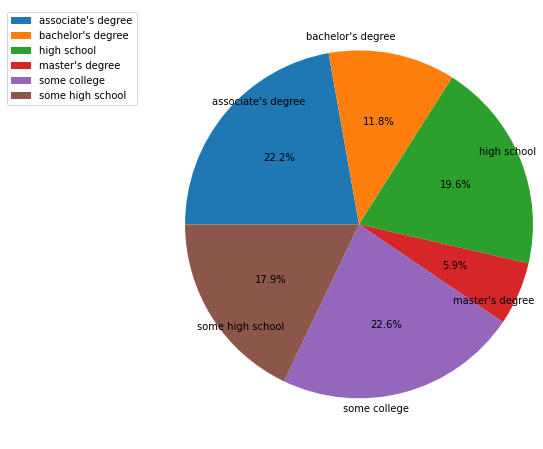

In [18]:
# Análisis de la variable Departament
plt.figure(figsize=(12,8))
print("Nivel de educacion de los padres: ")
labels = Df.groupby(['parental level of education'])['parental level of education'].count().index
plt.pie(Df.groupby(['parental level of education'])['parental level of education'].count()/Df.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.legend()
plt.xlim(1.5)
plt.show()

Observaciones:
1. El 17.7% de los padres obtuvieron titulación mayor a la escuela secundaria conformado por 5.9% de los padres tuvieron un título de maestría  ,el 11.8% el título de bachillerato.    

# Variables independientes Análisis explicativo de datos

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

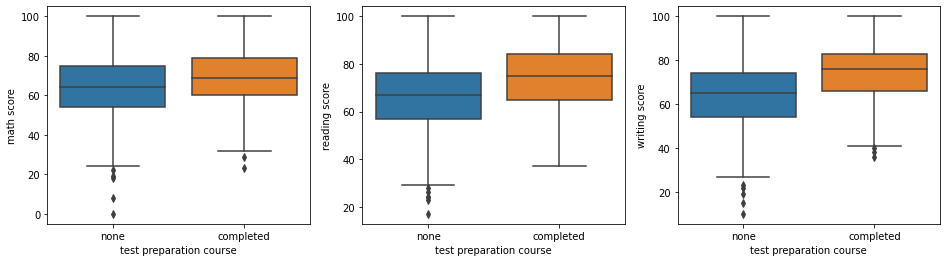

In [19]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(x='test preparation course',y='math score',data=Df)
plt.subplot(1,3,2)
sns.boxplot(x='test preparation course',y='reading score',data=Df)
plt.subplot(1,3,3)
sns.boxplot(x='test preparation course',y='writing score',data=Df)

Observaciones:
1. La media sobre los estudiantes que se prepararon para el tema es mayor a los que no, además de presentar menor datos atípicos referentes a puntajes bajos. 
2. Hay más valores atípicos referentes a puntajes por debajo de el Q1 en las aptitudes de escritura y matemáticas .
3. El puntaje medio es similar para las tres aptitudes. 


<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

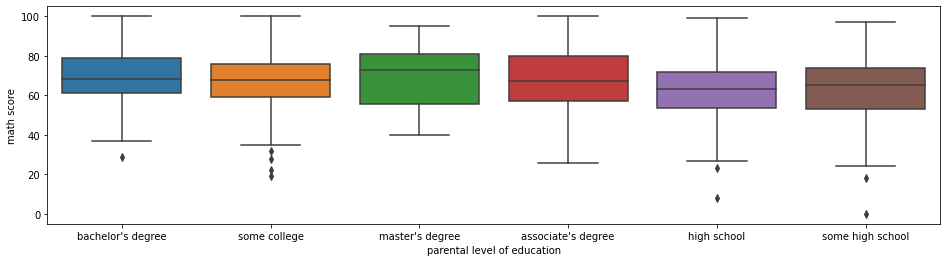

In [20]:
plt.figure(figsize=(16,4))


sns.boxplot(x='parental level of education',y='math score',data=Df)


<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

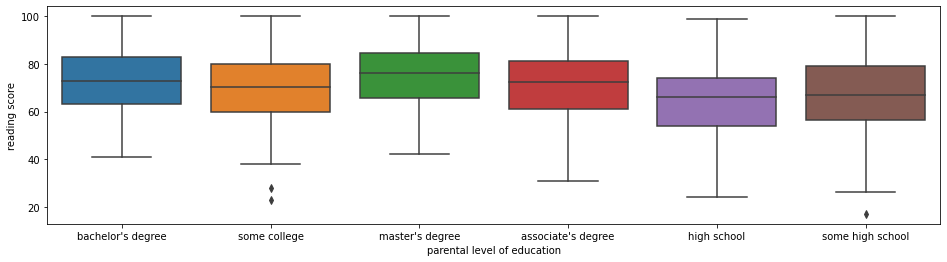

In [21]:
plt.figure(figsize=(16,4))
sns.boxplot(x='parental level of education',y='reading score',data=Df)


<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

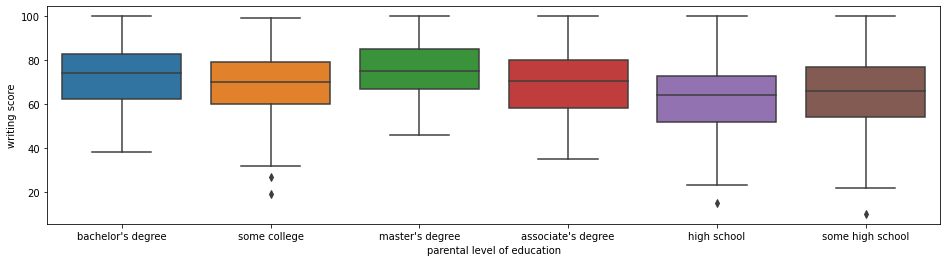

In [22]:
plt.figure(figsize=(16,4))
sns.boxplot(x='parental level of education',y='writing score',data=Df)

Observaciones:
1. La media más alta para las tres aptitudes es de los hijos de padres con título de maestría . 
2. Los datos atípicos tienden a aparecer sobre los hijos con padres de titulación menor al bachillerato .
3. El Q3 en todos es cercano al 100 . 

In [23]:
# descripción de las variables numéricas
Df['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

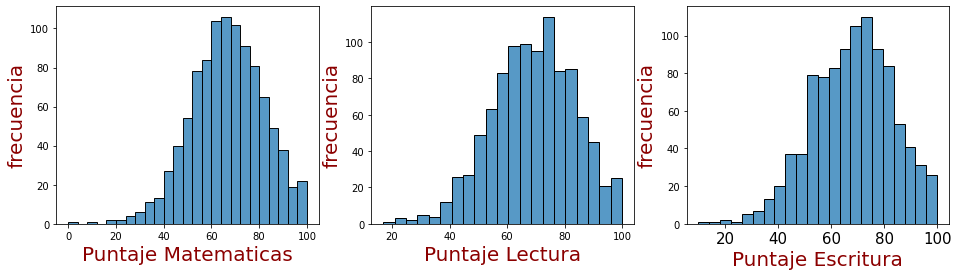

In [24]:
# gráficas de histograma
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(data=Df, x="math score")
plt.xlabel("Puntaje Matematicas", fontsize = 20,  color = 'darkred')
plt.ylabel("frecuencia", fontsize = 20, color = 'darkred')



plt.subplot(1,3,2)
sns.histplot(data=Df, x="reading score")
plt.xlabel("Puntaje Lectura", fontsize = 20,  color = 'darkred')
plt.ylabel("frecuencia", fontsize = 20, color = 'darkred')

plt.subplot(1,3,3)
sns.histplot(data=Df, x="writing score")
plt.xlabel("Puntaje Escritura", fontsize = 20,  color = 'darkred')
plt.ylabel("frecuencia", fontsize = 20, color = 'darkred')

plt.xticks(fontsize = 15)

plt.show()

Observaciones:
1. La mayoria de los estudiantes se situa con puntajes entre 55 a 85.
2. Los hay pocos casos de estudiantes con puntajes menor a 40 .
